## Numerical Integration

## The implementention of 3 methods 

<p>My assigned task was 'Trapezoid Rule'. I tried to implement all the methods with corersponding graphs.</p>

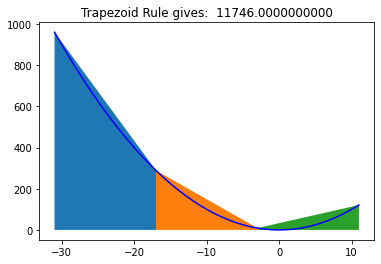

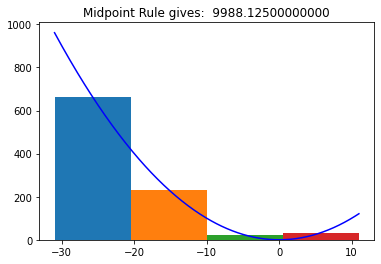

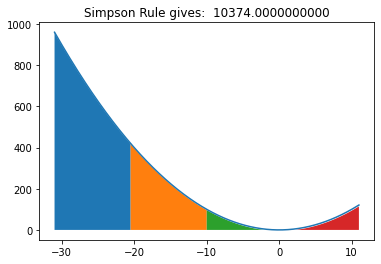

In [ ]:
from sympy.abc import x
from sympy.parsing.sympy_parser import parse_expr
from sympy import *
import matplotlib.pyplot as plt
import numpy as np 


#Trapazoid Rule

def trapezoid(function, start, end, split):
    x = symbols('x')
    expr = parse_expr(function)

    def func(y):
        return expr.subs(x, y)

    x_of_split = []
    area_of_split = []

    x_dist = (end - start) / split             #delta x

    for each in range(split + 1):
        x_of_split.append(start + (each * x_dist))

    for another in range(split):
        area_of_split.append(
            ((func(x_of_split[another])+(func(x_of_split[another+1])))/2) * x_dist)
    
    arr = np.linspace(start, end, split*100)       #linspace for original funtion
    ar = np.linspace(start, end, split+1)          # linspace for bars
    y_val = []
    y_v = []
    for a in arr:
      y_val.append(func(a))
    for a in ar:
      y_v.append(func(a))

    plt.plot(arr, y_val,color='b')                   # plot original function
    
    ar = np.array(ar, dtype=float)
    y_v = np.array(y_v, dtype=float)
    for i in range(1,split+1):
        plt.fill_between([ar[i-1],ar[i]],[y_v[i-1],y_v[i]])          # plot bars
    plt.title('Trapezoid Rule gives:  '+str(sum(area_of_split)))
    plt.show()
    return


# Midpoint Rule

def midpoint(function, start, end, split):
    x = symbols('x')
    expr = parse_expr(function)

    def func(y):
        return expr.subs(x, y)

    x_of_split = []
    area_of_split = []
    x_dist = (end - start) / split
    midpoint =[]

    for each in range(split+1):
        x_of_split.append(start + (each * x_dist))

    for i in range(split):
        midpoint.append((x_of_split[i]+x_of_split[i+1])/2)

    for another in range(split):
        area_of_split.append((func(midpoint[another]) * x_dist))

    arr = np.linspace(start, end, split*100)
    ar = np.linspace(start, end, split)
    y_val = []
    y_v = []
    for a in arr:
      y_val.append(func(a))
    for a in midpoint:
      y_v.append(func(a))

    plt.plot(arr, y_val,color='b')
    for i in range(split):
      plt.bar(midpoint[i],y_v[i],width=x_dist)
    plt.title('Midpoint Rule gives:  '+str(sum(area_of_split)))
    plt.show()
    return 



# Simpsons Rule

def simpson(function, start, end, split):

    if split % 2 != 0:
        raise ValueError('Enter Even value for Split ! Closing the program...')

    x = symbols('x')
    expr = parse_expr(function)

    def func(y):
        return expr.subs(x, y)

    x_of_split = []
    area_of_split = []

    x_dist = (end - start) / split
    t_area = func(start) + func(end)

    for i in range(1, split, 2):
        t_area += 4 * func(start + i * x_dist)

    for i in range(2, split-1, 2):
        t_area += 2 * func(start + i * x_dist)
    t_area *= x_dist/3

    arr = np.linspace(start, end, split*100)
    ar = np.linspace(start, end, split+1)
    y_val = []
    y_v = []
    for a in arr:
      y_val.append(func(a))
    for a in ar:
      y_v.append(func(a))

    plt.plot(arr, y_val,)  
    
    ar = np.array(ar, dtype=float)
    arr = np.array(arr, dtype=float)
    y_val = np.array(y_val, dtype=float)
    y_v = np.array(y_v, dtype=float)

    for i in range(1,split+1):
        plt.fill_between([ar[i-1],ar[i]],[y_v[i-1],y_v[i]])
    
    plt.fill_between(arr, y_val, np.max(y_val), color='w')
    plt.title('Simpson Rule gives:  '+str(t_area))
    plt.show()

    return 


#Testing:

trapezoid('x**2',-31,11,3)
print()
print()
midpoint('x**2',-31,11,4)
print()
print()
simpson('x**2',-31,11,4)